In [1]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize
from PIL import Image


from pc import PS
from modules import ADC,DAC,CHIP
from cimCommand import CMD,CmdData,Packet
from cimCommand.singleCmdInfo import *

from util import plot_v_cond

In [2]:
chip=CHIP(PS(host="192.168.1.10", port = 7, debug=0),init=True)
chip.set_device_cfg(deviceType=0)

Connected to 192.168.1.10:7
local ip: 192.168.1.15 local port: 57616


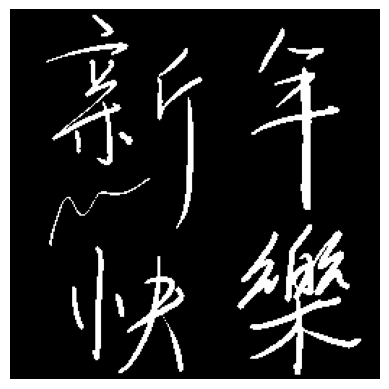

In [13]:
img = Image.open('images/image4.jpg').convert('L')
img = img.resize((256, 256), Image.LANCZOS)

img = np.array(img)
img = np.where(img >= 128, 0, 1).astype(np.uint8)


# row,col = img.shape
# for i in range(row):
#     for j in range(col):
#         print(img[i,j],end=' ')
#     print('')

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# 1. 初始读阵列

需要读65536个点
需要读65536个点


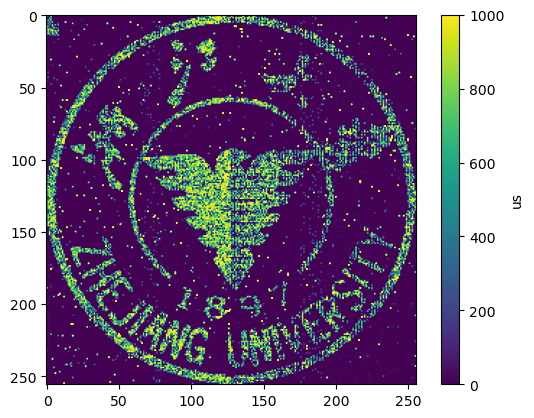

In [ ]:
# 这里用逐点读+减去0v读的base
voltage_base1 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)
voltage1 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0.1,tg=5,gain=1,from_row=True,out_type=0)

In [ ]:
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1000)
im = plt.imshow(chip.voltage_to_cond(voltage1-voltage_base1), cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.show()

# 2. 把有值的地方先reset掉

In [ ]:
# 先reset掉
cond_start = chip.voltage_to_cond(voltage1-voltage_base1)
# 需要写0的地方, 电导>200us, 需要reset
condition_reset = cond_start > 200
is_set = False
chip.write_point2(crossbar=condition_reset,write_voltage=2,tg=5,pulse_width=1000e-6,set_device=is_set)

需要写11772个点


# 3. reset之后再读一次看看效果

需要读65536个点


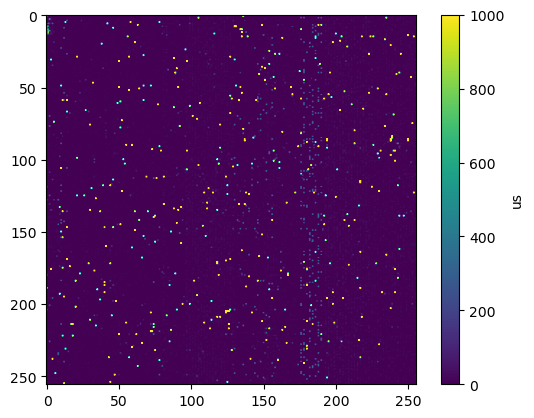

In [ ]:
# 这里用逐点读+减去0v读的base
voltage_base2 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)
voltage2 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0.1,tg=5,gain=1,from_row=True,out_type=0)

In [ ]:
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1000)
im = plt.imshow(chip.voltage_to_cond(voltage2-voltage_base2), cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.show()

# 4. reset之后再set需要set的地方

In [14]:
cond_start = chip.voltage_to_cond(voltage2-voltage_base2)

condition_set = (cond_start < 800) & (img > 0.5)
is_set = True
chip.write_point2(crossbar=condition_set,write_voltage=3,tg=2.5,pulse_width=1000e-6,set_device=is_set)

需要写6151个点


# 5. set之后再读一次看看效果

In [ ]:
# 这里用逐点读+减去0v读的base
voltage_base3 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)
voltage3 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0.1,tg=5,gain=1,from_row=True,out_type=0)

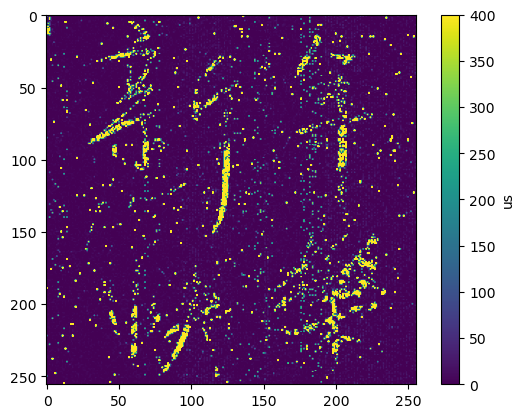

In [18]:
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=400)
im = plt.imshow(chip.voltage_to_cond(voltage3-voltage_base3), cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.show()

# 6. 可以根据图片一次完成reset和set操作, 进行写图片

In [ ]:
cond_start = chip.voltage_to_cond(voltage1-voltage_base1)
# 需要写0的地方, 电导>200us, 需要reset
condition_reset = (cond_start > 200) & (img < 0.5)
chip.write_point2(crossbar=condition_reset,write_voltage=2,tg=5,pulse_width=1000e-6,set_device=False)
# 需要写1的地方, 电导<800us, 需要set
condition_set = (cond_start < 800) & (img > 0.5)
chip.write_point2(crossbar=condition_set,write_voltage=3,tg=2.5,pulse_width=1000e-6,set_device=True)

In [ ]:
# 这里用逐点读+减去0v读的base
voltage_base4 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)
voltage4 = chip.read_point2(crossbar=np.ones((256,256)),
                                read_voltage=0.1,tg=5,gain=1,from_row=True,out_type=0)
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1000)
im = plt.imshow(chip.voltage_to_cond(voltage4-voltage_base4), cmap=cmap,norm=norm)
cbar = plt.colorbar(im)
cbar.set_label("us")
plt.show()